# K-Means

In [26]:
import numpy as np
import matplotlib.pyplot as plt

[[  7.81169551   2.77868565]
 [ -6.9627643   10.41152039]
 [ -8.85914727   5.79819048]
 [-11.30007114   4.9308345 ]
 [ -7.88154728  -5.43578603]
 [ -5.60922806  -5.84248014]
 [  4.3128652    2.48580017]
 [ -9.63909288   7.71800781]
 [  4.18996222   6.59745727]
 [ -5.49776159  -5.80974056]] [1 0 3 3 2 2 1 3 1 2]


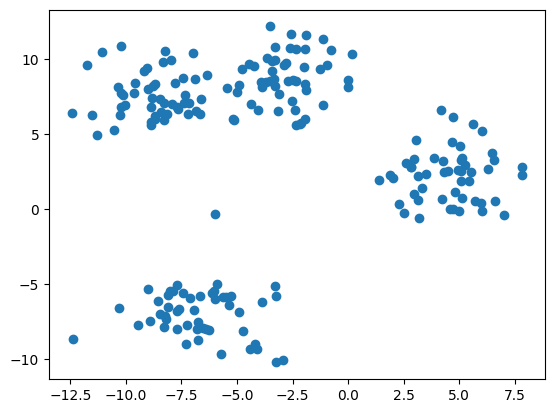

In [ ]:
# Δημιουργία συνθετικών δεδομένων
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=42, cluster_std=1.7)
print(X[:10],y[:10])
plt.scatter(X[:,0],X[:,1]);

In [ ]:
# Εφαρμογή KMeans
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[-6.66605397 -6.89598614]
 [-2.84575452  8.68238439]
 [ 4.54501531  2.2621267 ]
 [-8.79665432  7.5872495 ]]


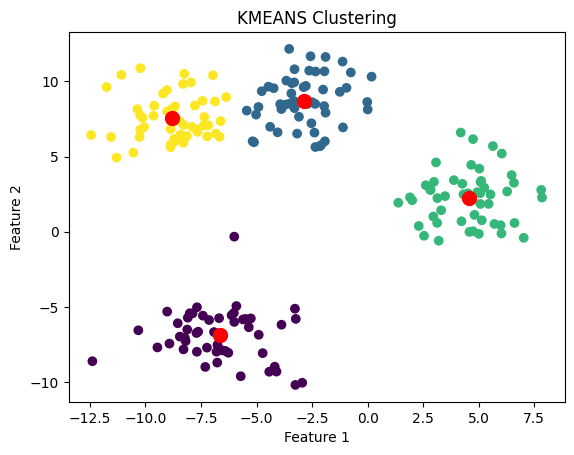

In [ ]:
# Οπτικοποίηση αποτελεσμάτων
plt.scatter(X[:,0],X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); 
plt.title("KMEANS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

In [ ]:
# remap the predicted cluster labels to match the true labels (known from make_blobs, this is not normally known)
from scipy.stats import mode
from sklearn.metrics import accuracy_score

labels = np.zeros_like(model.labels_)
for i in range(4):
    mask = (model.labels_ == i)
    labels[mask] = mode(y[mask])[0]

acc = accuracy_score(y, labels)
print("Accuracy score:", acc)

Accuracy score: 0.985


In [ ]:
# Υπολογισμός Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_)
print("Silhouette score:", score)

Silhouette score: 0.6489658465525685
